# Jupyter Notebook for Perceptron
Auto-generated notebook.

In [66]:
import numpy as np

from sklearn.linear_model import Perceptron
from sklearn.datasets import make_classification, make_blobs
from sklearn.model_selection import train_test_split

import os, sys, plotly.graph_objects as go
module_path = os.path.abspath(os.path.join('../../../..'))
if module_path not in sys.path:
    sys.path.append(module_path) 

from erudition.learning.helpers.plots.plotly_render import render, scatter

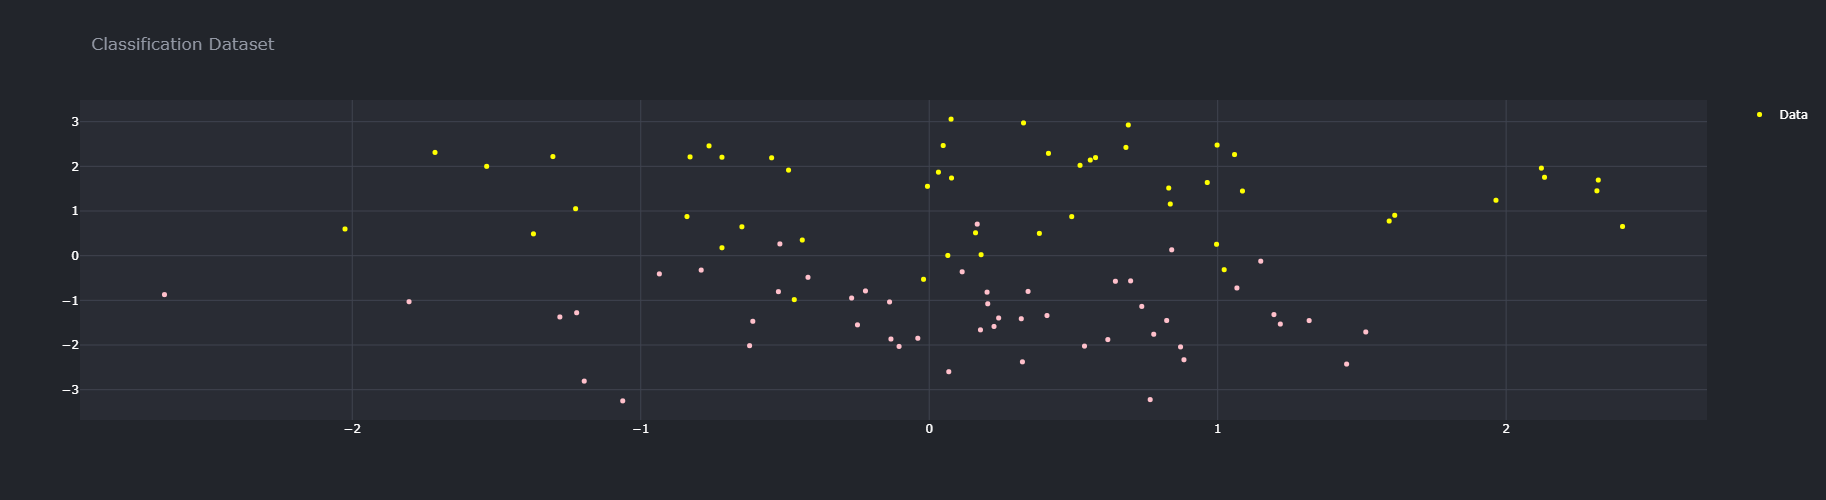

In [248]:
X,y  = make_classification(n_classes=2, n_clusters_per_class=2, random_state=42, n_samples=100, class_sep=1.5, shift=0)
X = X[:,:2]
fig = go.Figure(data=[scatter(X[:,0], X[:,1], 'Data', mode='markers', size=5, opacity=1, color = [['yellow', 'pink', 'orange', 'white'][a] for a in y])])
render(fig, title='Classification Dataset', height=500, width=600)

In [279]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

perc = Perceptron(n_jobs=-1, tol=1e-3)
perc.fit(X_train, y_train)

y_pred = perc.predict(X_test)

print(y_pred)
print(y_test)

np.mean(y_pred-y_test)



[0 0 0 1 0 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1 1 0 0 1 1]
[0 0 0 1 0 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1 1 0 0 1 1]


0.0

training SGD
training ASGD
training Perceptron
training Passive-Aggressive I
training Passive-Aggressive II
training SAG


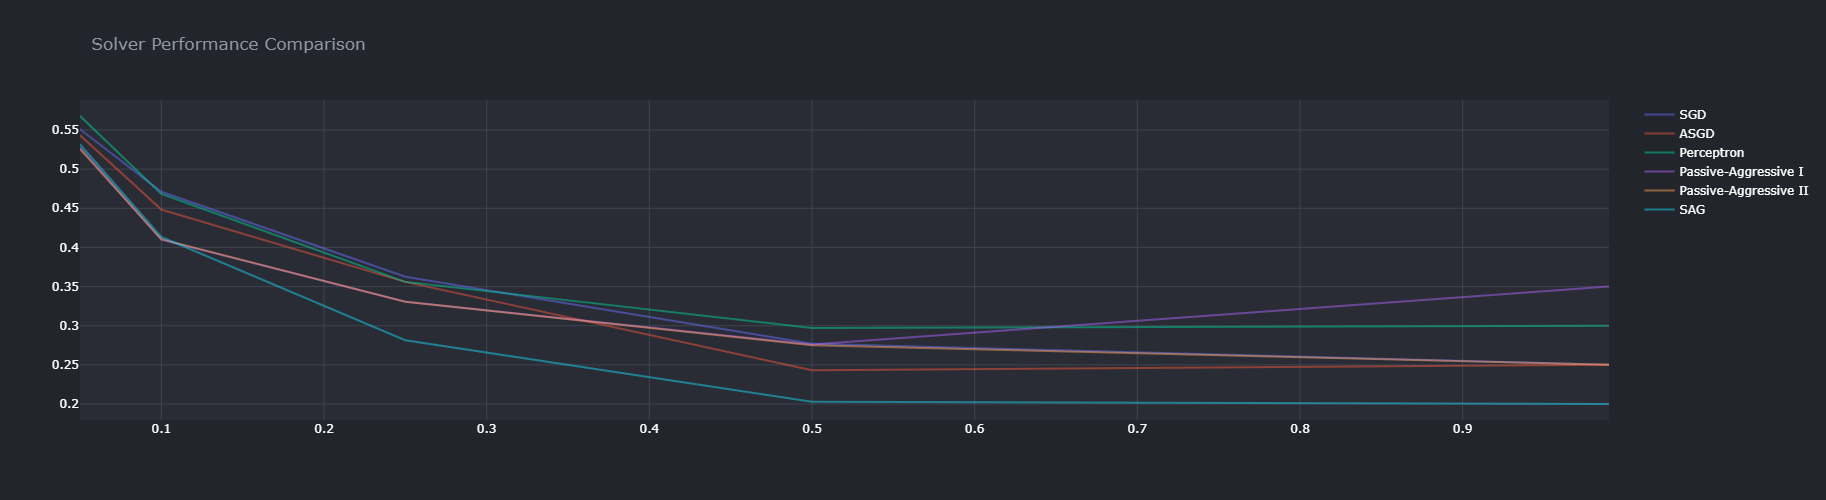

In [280]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier, Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import LogisticRegression

heldout = [0.95, 0.90, 0.75, 0.50, 0.01]
rounds = 20
X,y  = make_classification(n_classes=4, n_clusters_per_class=1, random_state=42)

classifiers = [
    ("SGD", SGDClassifier(max_iter=100)),
    ("ASGD", SGDClassifier(average=True)),
    ("Perceptron", Perceptron()),
    ("Passive-Aggressive I", PassiveAggressiveClassifier(loss='hinge', C=1.0, tol=1e-4)),
    ("Passive-Aggressive II", PassiveAggressiveClassifier(loss='squared_hinge', C=1.0, tol=1e-4)),
    ("SAG", LogisticRegression(multi_class='auto', solver='sag', tol=1e-1, C=1.e4 / X.shape[0]))
]

xx = 1. - np.array(heldout)

plts = []

for name, clf in classifiers:
    print("training %s" % name)
    rng = np.random.RandomState(42)
    yy = []
    for i in heldout:
        yy_ = []
        for r in range(rounds):
            X_train, X_test, y_train, y_test = \
                train_test_split(X, y, test_size=i, random_state=rng)
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            yy_.append(1 - np.mean(y_pred == y_test))
        yy.append(np.mean(yy_))

    plts.append(scatter(xx,yy, name))

fig = go.Figure(data=plts)
render(fig, title='Solver Performance Comparison', width=1000)
